<a href="https://colab.research.google.com/github/aabitokh/home_repo/blob/develop/tensorflow_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

In [ ]:
tf.constant(1, shape=(1,1))

<tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[1]], dtype=int32)>

In [ ]:
tf.zeros((2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

In [ ]:
tf.ones((2,2))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
sample = tf.Variable([1,2,3,4])
print(sample)

tf.zeros_like(sample)

<tf.Variable 'Variable:0' shape=(4,) dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>


<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 0, 0], dtype=int32)>

In [ ]:
tf.eye(3,2)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 0.],
       [0., 1.],
       [0., 0.]], dtype=float32)>

In [ ]:
#создает новый объект, копию тензора. не ссылку, а именно новый объект
sample_new = tf.identity(sample)

In [ ]:
sample_new

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 2, 3, 4], dtype=int32)>

In [ ]:
tf.fill((2,3), -666)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[-666, -666, -666],
       [-666, -666, -666]], dtype=int32)>

In [ ]:
stupid_range = tf.range(666, 667, 0.100)

In [ ]:
stupid_range

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([666. , 666.1, 666.2, 666.3, 666.4, 666.5, 666.6, 666.7, 666.8,
       666.9], dtype=float32)>

In [ ]:
 tf.random.normal((1,10))

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-0.9808352 ,  0.2109795 ,  0.21879803,  0.00845762, -0.73394316,
         0.14719214, -0.49559495, -0.12613618,  0.768158  ,  0.14700793]],
      dtype=float32)>

In [ ]:
a = tf.Variable([0, 2, 3])
b = tf.Variable([0, 5, 3])

In [ ]:
a * b

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 0, 10,  9], dtype=int32)>

In [ ]:
#скалярное произведение
tf.tensordot(a, b, axes = 1)

<tf.Tensor: shape=(), dtype=int32, numpy=19>

In [ ]:
#внешнее умножение
tf.tensordot(a, b, axes = 0)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 0,  0,  0],
       [ 0, 10,  6],
       [ 0, 15,  9]], dtype=int32)>

In [ ]:
a = tf.constant(range(9), shape = (3,3))
print(a)

b = a = tf.constant(range(-8,1), shape = (3,3))
print(b)



tf.Tensor(
[[0 1 2]
 [3 4 5]
 [6 7 8]], shape=(3, 3), dtype=int32)
tf.Tensor(
[[-8 -7 -6]
 [-5 -4 -3]
 [-2 -1  0]], shape=(3, 3), dtype=int32)


In [ ]:
tf.matmul(a,b)

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[111,  90,  69],
       [ 66,  54,  42],
       [ 21,  18,  15]], dtype=int32)>

In [ ]:
m = a @ b
m

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[111,  90,  69],
       [ 66,  54,  42],
       [ 21,  18,  15]], dtype=int32)>

In [ ]:
tf.reduce_sum(m)
tf.reduce_max(m)
tf.reduce_min(m)

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [ ]:
tf.reduce_sum(m, axis = 1)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([270, 162,  54], dtype=int32)>

Строим градиентные алгоритмы оптимизации Adam, RMSProp, Adagrad, Adadelta

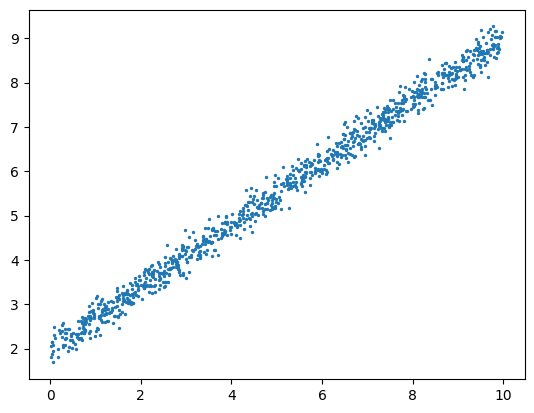

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
 
TOTAL_POINTS = 1000

#генерим данные с небольшим шумом  
x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)
 
k_true = 0.7
b_true = 2.0
 
y = x * k_true + b_true + noise
 
plt.scatter(x, y, s=2)
plt.show()

In [ ]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)


In [ ]:
#градиентный спуск 
EPOCHS = 500
learning_rate = 0.02

for n in range(EPOCHS):
    with tf.GradientTape() as t:
        f = k * x + b
        #mse как функция лоса 
        loss = tf.reduce_mean(tf.square(y - f))
 
    dk, db = t.gradient(loss, [k, b])
    
    #шаг в направлении антиградента 
    k.assign_sub(learning_rate * dk)
    b.assign_sub(learning_rate * db)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7048095>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9790508>


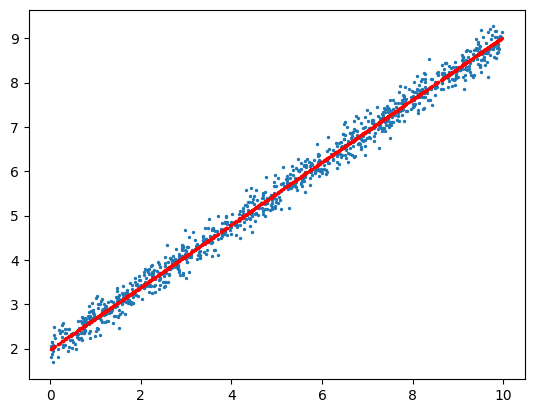

In [ ]:
#подобранные параметры 
print(k, b, sep="\n")
 
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

In [ ]:
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE
 
for n in range(50):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
 
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
 
        dk, db = t.gradient(loss, [k, b])
 
        k.assign_sub(learning_rate * dk)
        b.assign_sub(learning_rate * db)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.7135696>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.99051>


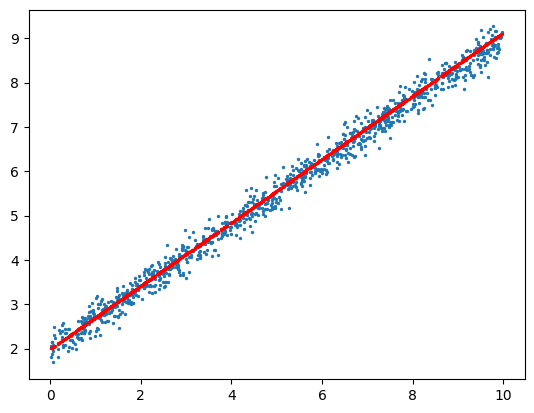

In [ ]:
#подобранные параметры 
print(k, b, sep="\n")
 
y_pr = k * x + b
plt.scatter(x, y, s=2)
plt.scatter(x, y_pr, c='r', s=2)
plt.show()

In [ ]:
#алгоритм стохастический градиентный спуск 
opt = tf.optimizers.SGD(learning_rate=0.02, momentum = 0.5)
#моментум лсглаживает градиент и не дает градиенту застрять в локальном минимуме

In [ ]:
BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE
 
for n in range(50):
    for n_batch in range(num_steps):
        y_batch = y[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
        x_batch = x[n_batch * BATCH_SIZE : (n_batch+1) * BATCH_SIZE]
 
        with tf.GradientTape() as t:
            f = k * x_batch + b
            loss = tf.reduce_mean(tf.square(y_batch - f))
 
        dk, db = t.gradient(loss, [k, b])
        opt.apply_gradients(zip([dk, db], [k, b]))

In [ ]:
#сделаем простую нейросетку 
#модуль -- базовый класс 
class DenseNN(tf.Module):
    def __init__(self, outputs):
        super().__init__()
        self.outputs = outputs
        self.fl_init = False
    #делает класс функцией (функтор)
    #ожидает вектор входных параметров 
    def __call__(self, x):
        if not self.fl_init:
            self.w = tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name="w")
            self.b = tf.zeros([self.outputs], dtype=tf.float32, name="b")
 
            self.w = tf.Variable(self.w)
            self.b = tf.Variable(self.b)
 
            self.fl_init = True
 
        y = x @ self.w + self.b
        return y

In [ ]:
model = DenseNN(1)

In [ ]:
#цель -- обучить сеть складывать числа 
print(model(tf.constant([[1.0, 2.0]])) )

tf.Tensor([[0.23619631]], shape=(1, 1), dtype=float32)


In [ ]:
x_train = tf.random.uniform(minval=0, maxval=10, shape=(100, 2))
y_train = [a + b for a, b in x_train]

In [ ]:
loss = lambda x, y: tf.reduce_mean(tf.square(x - y))
opt = tf.optimizers.Adam(learning_rate=0.01)

In [ ]:
EPOCHS = 50
for n in range(EPOCHS):
    for x, y in zip(x_train, y_train):
        #делает вектор x матрицей
        x = tf.expand_dims(x, axis=0)
        y = tf.constant(y, shape=(1, 1))
 
        with tf.GradientTape() as tape:
            f_loss = loss(y, model(x))
        #градиент по всем параметрам модели и прибавляет градиент к параметрам
        grads = tape.gradient(f_loss, model.trainable_variables)
        opt.apply_gradients(zip(grads, model.trainable_variables))
 
        print(f_loss.numpy())

122.39104
139.53474
10.385621
211.32669
13.775471
56.149715
91.6947
41.586548
85.44224
64.659096
47.369484
89.197426
161.96394
69.11583
47.838737
23.036404
23.92456
179.64864
0.8760491
92.29169
93.37796
12.574055
10.424725
127.308136
60.018887
6.6953616
7.5284524
29.209425
74.21311
0.08296971
25.139172
125.75651
28.066029
5.7831326
81.95694
37.660618
11.715069
1.2158387
34.474346
99.98146
10.297654
71.426414
101.15831
26.640669
134.56322
75.65559
28.204643
34.176483
48.935833
7.240217
101.23072
27.576456
9.573628
22.25807
21.929512
60.421646
4.6328535
6.2975607
45.355553
32.275253
22.807476
12.323061
71.7306
35.53106
36.233047
24.422167
4.7649293
13.156961
2.0343244
24.578115
8.401001
19.793077
4.98233
12.014488
26.395424
3.1676302
33.70827
5.3826175
29.96192
9.500907
14.635457
15.486233
15.737951
7.892201
9.827335
12.923924
4.802036
0.98807764
7.776513
2.214101
18.871088
7.89562
9.6462345
26.342102
12.918316
12.361785
14.10994
4.589983
4.7136054
9.739304
6.120525
10.4764185
0.06370427

In [ ]:
model.trainable_variables

(<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.6559765e-06], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.9999998],
        [0.9999999]], dtype=float32)>)

In [ ]:
#цель -- обучить сеть складывать числа 
print(model(tf.constant([[1.0, 2.0]])) )

tf.Tensor([[3.0000012]], shape=(1, 1), dtype=float32)


# практика с MNIST

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
#60 000 примеров размером 28 28 
x_train.shape
x_train[0].shape
#картинка в виде матрицы 
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
#нормируем картинки
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
#60 000 примеров размером 28 28 
x_train.shape
x_train[0].shape
#картинка в виде матрицы все тоже самое, но значения от 0 до единицы 
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#каждая картинка предстоет одним большим вектором  
x_train = tf.reshape(tf.cast(x_train, tf.float32), [-1, 28*28])
x_test = tf.reshape(tf.cast(x_test, tf.float32), [-1, 28*28])
 
y_train = to_categorical(y_train, 10)

In [ ]:
class DenseNN(tf.Module):
    def __init__(self, outputs, activate="relu"):
        super().__init__()
        #10 аутпутов -- 10 цифр
        self.outputs = outputs
        self.activate = activate
        self.fl_init = False
 
    def __call__(self, x):
        if not self.fl_init:
            #сначла формируем рандомные веса 
            #786 > 10 матрица  
            self.w = tf.random.truncated_normal((x.shape[-1], self.outputs), stddev=0.1, name="w")
            self.b = tf.zeros([self.outputs], dtype=tf.float32, name="b")
 
            self.w = tf.Variable(self.w)
            self.b = tf.Variable(self.b)
 
            self.fl_init = True
 
        y = x @ self.w + self.b
 
        if self.activate == "relu":
            return tf.nn.relu(y)
        elif self.activate == "softmax":
            return tf.nn.softmax(y)
 
        return y

In [ ]:
layer_1 = DenseNN(128)
layer_2 = DenseNN(10, activate="softmax")

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
def model_predict(x):
    y = layer_1(x)
    y = layer_2(y)
    return y     

In [ ]:
cross_entropy = lambda y_true, y_pred: tf.reduce_mean(tf.losses.categorical_crossentropy(y_true, y_pred))

In [ ]:
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)

In [ ]:
BATCH_SIZE = 32
EPOCHS = 10
TOTAL = x_train.shape[0]

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(BATCH_SIZE)

In [ ]:
#перемешанный датасет с батчами x_batch/y_batch
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
for n in range(EPOCHS):
    loss = 0

    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            f_loss = cross_entropy(y_batch, model_predict(x_batch))

        loss += f_loss
        grads = tape.gradient(f_loss, [layer_1.trainable_variables, layer_2.trainable_variables])
        opt.apply_gradients(zip(grads[0], layer_1.trainable_variables))
        opt.apply_gradients(zip(grads[1], layer_2.trainable_variables))

    print(loss.numpy())

483.15323
207.12477
142.45052
104.03754
79.40645
62.280727
46.609806
38.163616
29.235252
24.479485


In [ ]:
y = model_predict(x_test)
y2 = tf.argmax(y, axis=1).numpy()
acc = len(y_test[y_test == y2])/y_test.shape[0] * 100
print(acc)

97.39


In [ ]:
#собственно сама модель 
class SequentialModule(tf.Module):
    def __init__(self):
        super().__init__()
        #первый hidden слой 
        self.layer_1 = DenseNN(128)
        #выходнйо
        self.layer_2 = DenseNN(10, activate="softmax")
 
    def __call__(self, x):
        return self.layer_2(self.layer_1(x))

In [ ]:
model = SequentialModule()

In [ ]:
for n in range(EPOCHS):
    loss = 0

    for x_batch, y_batch in train_dataset:
        with tf.GradientTape() as tape:
            f_loss = cross_entropy(y_batch, model(x_batch))

        loss += f_loss
        grads = tape.gradient(f_loss, model.trainable_variables)
        opt.apply_gradients(zip(grads, model.trainable_variables))

    print(loss.numpy())

355.2522
165.23277
117.966225
87.58578
67.9185
51.873768
41.287582
32.891666
25.32411
22.367804


In [ ]:
print(model.submodules[0])

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
class DenseLayer(tf.keras.layers.Layer):
    def __init__(self, units=1):
        super().__init__()
        self.units = units
        self.rate = 0.01

    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer="random_normal",
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer="zeros", trainable=True)

    def call(self, inputs):
        regular = 100.0 * tf.reduce_mean(tf.square(self.w))
        self.add_loss(regular)
        self.add_metric(regular, name="mean square weights")

        return tf.matmul(inputs, self.w) + self.b


class NeuralNetwork(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.layer_1 = DenseLayer(128)
        self.layer_2 = DenseLayer(10)

    def call(self, inputs):
        x = self.layer_1(inputs)
        x = tf.nn.relu(x)
        x = self.layer_2(x)
        x = tf.nn.softmax(x)
        return x

